In [ ]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import keras
# Connect to your google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


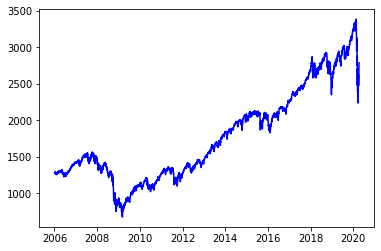

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read Data
import os
os.chdir('/content/drive/My Drive')

df = pd.read_csv('S&P 500 Historical Data.csv')

# Importing the training set of S&P 500 Historical Data
stockprice_Historical = pd.read_csv('S&P 500 Historical Data.csv')
dataset = stockprice_Historical.iloc[:, 0:2].values # pick 'Date' and 'Price' Columns
dataset[:,0] = pd.to_datetime(dataset[:,0]) # Convert 'Date' from string type variable to 'Datetime' type variable

# Visualising the 'Open' price
plt.plot(dataset[:,0], dataset[:,1],  color = 'blue', label = 'Real S&P 500 Historical Stock Price')
plt.show()

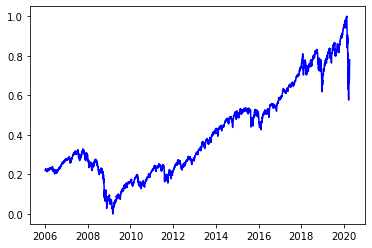

(3500, 60, 1)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
dataset_scaled = sc.fit_transform(dataset[:,1].reshape(-1, 1))

# Visualising the scaled price
plt.plot(dataset[:,0], dataset_scaled,  color = 'blue', label = 'Real S&P 500 Historical Stock Price')
plt.show()

# Creating a data structure, use 60 previous prices to Predict today's price
X = []
y = []
for i in range(90, len(dataset_scaled)):
    X.append(dataset_scaled[i-90:i-30, 0])
    y.append(dataset_scaled[i, 0])
X = np.array(X)
y = np.array(y)

# Reshaping
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(X.shape)

In [ ]:
# Part 2 - RNN Modeling
## Split the data into training set and the test set in chronological order
#X_training = X[0:1000, :, :]
#X_test = X[1000:, :, :]
#y_training = y[0:1000]
#y_test = y[1000:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

# In[3]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, input_shape = (X_training.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])

# Show Model Structure
regressor.summary()

# Fitting the RNN to the Training set
history = regressor.fit(X_training, y_training, epochs = 50, batch_size = 32, 
                        validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Train on 2450 samples, validate on 1050 samples
Epoch 1/50
2450/2450 [==============================] - 8s 3ms/step - loss: 0.0079 - mean_absolute_error: 0.0556 - val_loss: 0.0036 - val_mean_absolute_error: 0.0354
Epoch 2/50
2450/2450 [==============================] - 8s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0279 - val_loss: 0.0037 - val_mean_absolute_error: 0.0381


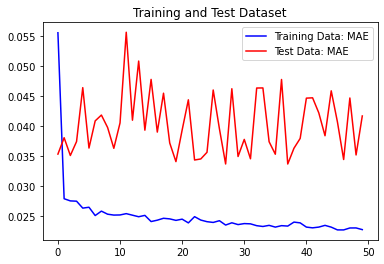

In [ ]:
# Visualize the training history
# Let's plot our results again:
mae = history.history['mean_absolute_error']
mae_test = history.history['val_mean_absolute_error']
epochs = range(len(mae))

from matplotlib import pyplot as plt
plt.plot(epochs, mae, 'b-', label='Training Data: MAE')
plt.plot(epochs, mae_test, 'r-', label='Test Data: MAE')
plt.title('Training and Test Dataset')
plt.legend()
plt.show()

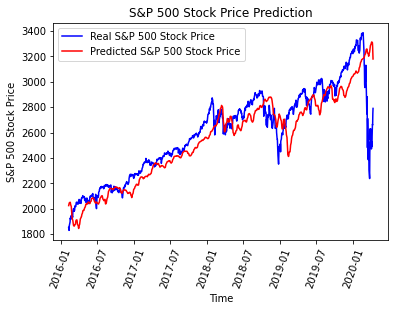

The RMSE error on the test dataset 160.03722334855962
The MAE error on the test dataset 10.632209236849057


In [ ]:
# Part 3 - Making the predictions and visualising the results

# Extract the real stock price in test set
real_stock_price = dataset[2540:,1]
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(dataset[2540:,0], real_stock_price, color = 'blue', label = 'Real S&P 500 Stock Price')
plt.plot(dataset[2540:,0], predicted_stock_price, color = 'red', label = 'Predicted S&P 500 Stock Price')
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500 Stock Price')
plt.xticks(rotation=70)
plt.legend()
plt.show()

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse_test = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
mae_test = math.sqrt(mean_absolute_error(real_stock_price, predicted_stock_price))

print('The RMSE error on the test dataset', rmse_test)
print('The MAE error on the test dataset', mae_test)